### <h2><center><font color='orange'>Random Forest with Feature Selection<font></a>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif

# Load the DataFrame from the pickle file
pickle_file_path = 'cleaned_personal_loan_encoded.pkl'
df = pd.read_pickle(pickle_file_path)

# Prepare the data
X = df.drop('personal_loan_yes', axis=1)
y = df['personal_loan_yes']

# Select top 5 features based on ANOVA F-value
X_new = SelectKBest(f_classif, k=5).fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the RandomForestClassifier model
y_pred_rf = rf_model.predict(X_test)
print("RandomForestClassifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("RandomForestClassifier Report:\n\n", classification_report(y_test, y_pred_rf))


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [7 8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


RandomForestClassifier Accuracy: 0.8922686945500634
RandomForestClassifier Report:

               precision    recall  f1-score   support

           0       0.93      0.95      0.94       710
           1       0.45      0.34      0.39        79

    accuracy                           0.89       789
   macro avg       0.69      0.65      0.66       789
weighted avg       0.88      0.89      0.89       789



Here's a step-by-step explanation of the code:

#### 1.Import Libraries: 
The code imports necessary libraries including pandas for data manipulation, train_test_split for splitting the data into training and testing sets, RandomForestClassifier and SVC for building machine learning models, and metrics from sklearn for evaluating the models.

#### 2.Load the Dataset:
The code loads a cleaned dataset from a pickle file ('cleaned_personal_loan_encoded.pkl') into a pandas DataFrame.

#### 3.Prepare the Data: 
The code prepares the data for training by separating the features (X) from the target variable (y). The 'personal_loan_yes' column is dropped from the DataFrame to create X, and it is assigned to y.

#### 4.Feature Selection:
The code uses SelectKBest from sklearn.feature_selection to select the top 5 features based on the ANOVA F-value. These selected features are stored in X_new.

#### 5.Split the Data: 
The code splits the data into training and testing sets using train_test_split. It uses X_new and y, with a test size of 20% and a random state of 42 for reproducibility.

#### 6.Train a Random Forest Classifier: 
The code initializes a RandomForestClassifier model with a random state of 42 and trains it on the training data (X_train, y_train).

#### 7.Predict and Evaluate the Model:
The code uses the trained RandomForestClassifier model to predict the target variable for the test data (X_test). It then calculates the accuracy of the predictions using accuracy_score and generates a classification report using classification_report, which includes metrics such as precision, recall, and F1-score for each class.

#### 8.Print Results: 
The code prints the accuracy of the RandomForestClassifier model and its classification report, providing insights into the model's performance.

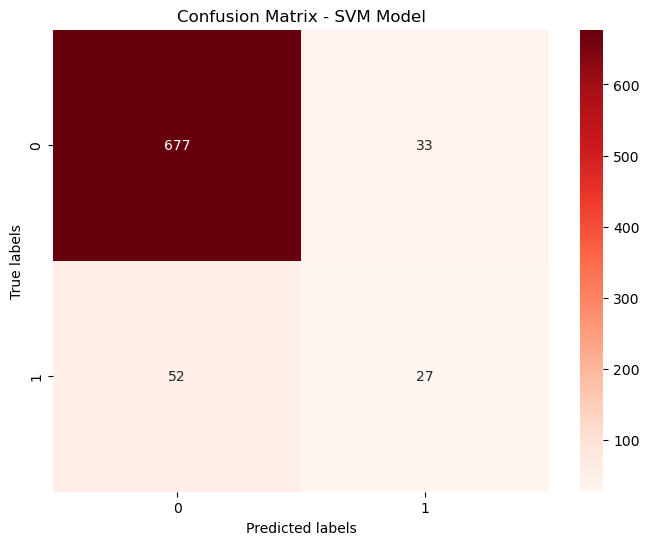

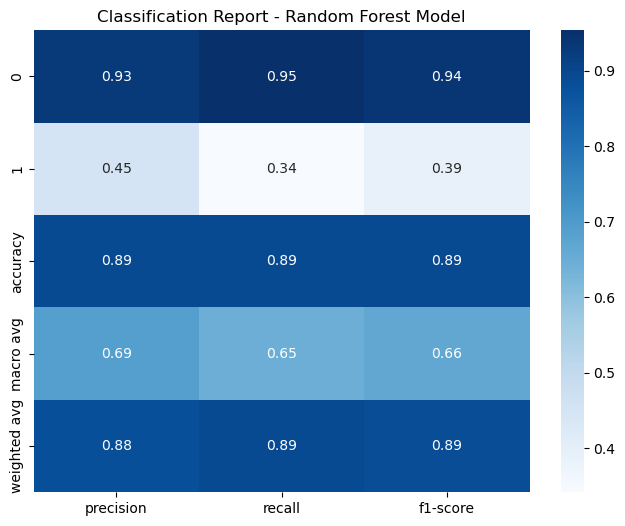

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM Model')
plt.show()

# Classification Report Visualization
clf_report = classification_report(y_test, y_pred_rf, output_dict=True)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report - Random Forest Model')
plt.show()